In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./Data Files/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.index.freq='MS'

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], 
                                    trend='mul', 
                                    seasonal='mul', 
                                    seasonal_periods = 12).fit()

In [10]:
test_predictions = fitted_model.forecast(36)

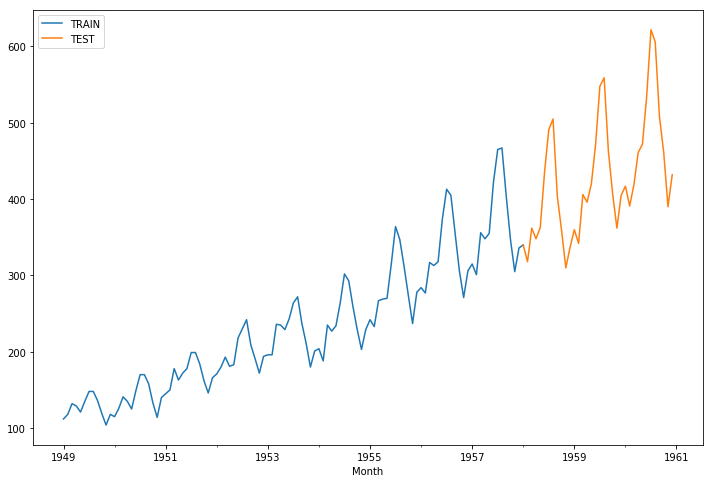

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

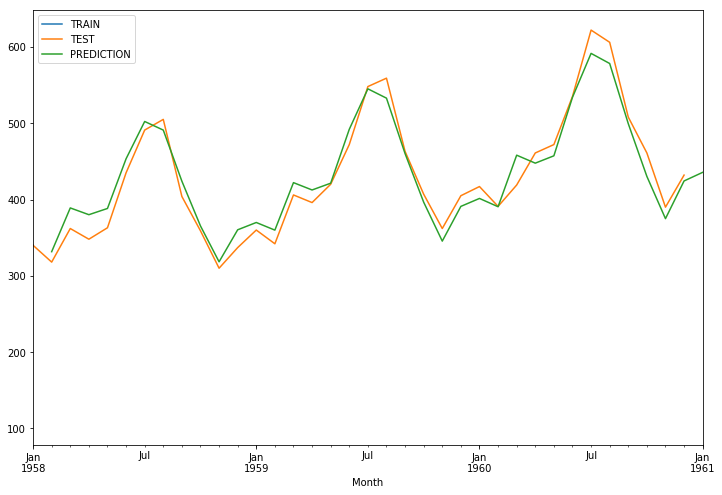

In [16]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01','1961-01-01'])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [18]:
mean_absolute_error(test_data, test_predictions)

46.30290453876919

In [20]:
mean_squared_error(test_data, test_predictions)

3075.328464707026

In [21]:
np.sqrt(mean_squared_error(test_data, test_predictions))

55.45564411948549

In [24]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [26]:
forecast_prediction = final_model.forecast(36)

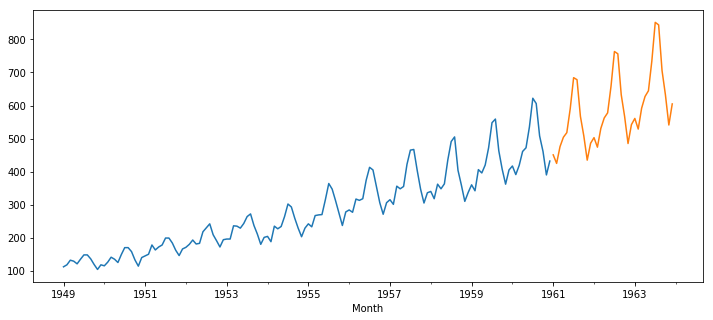

In [27]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_prediction.plot()